# Stock data EDA

In [32]:
import os

import scipy
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
stock_list = os.listdir("./data/stocks")

# Number of available stocks

In [3]:
print(f"There are {len(stock_list)} tickers available")

There are 7195 tickers available


# Data length distribution
Compare the amount of available data per ticker

In [17]:
all_stocks = []
not_found = []

for fn in stock_list:
    try:
        all_stocks.append(pd.read_csv("./data/stocks/" + fn))
    except (pd.errors.EmptyDataError, FileNotFoundError) as e:
        not_found.append(fn)

In [19]:
print(f"{len(all_stocks)} of tickers have data, {len(not_found)} are emtpty")

7163 of tickers have data, 32 are emtpty


In [22]:
lengths = [x.shape[0] for x in all_stocks]

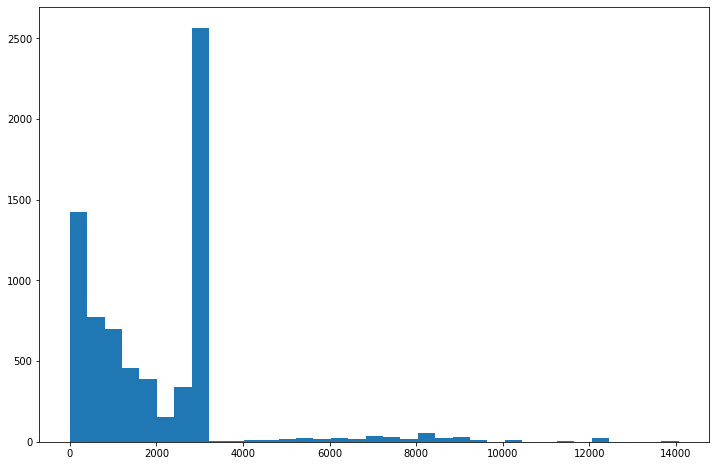

In [28]:
plt.figure(figsize=(12,8))
plt.hist(lengths, bins=35);

# Most common length of data
3201 data points with an occurrence of 1690

In [33]:
scipy.stats.mode(lengths)

ModeResult(mode=array([3201]), count=array([1690]))

In [49]:
print(f"In total, there are {np.sum(lengths)} data points in the set")

In total, there are 14887665 data points in the set


# Longest ticker data

In [35]:
print(f"Most data is available for ticker: {stock_list[np.argmax(lengths)]} with {np.max(lengths)} points")

Most data is available for ticker: ngl.us.txt with 14059 points


In [37]:
all_stocks[np.argmax(lengths)].head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,1962-01-02,6.4130,6.4130,6.3378,6.3378,467056,0
1,1962-01-03,6.3378,6.3963,6.3378,6.3963,350294,0
2,1962-01-04,6.3963,6.3963,6.3295,6.3295,314365,0
3,1962-01-05,6.3211,6.3211,6.1958,6.2041,440112,0
4,1962-01-08,6.2041,6.2041,6.0373,6.0870,655676,0


### The NGL.US stock started in 1962

# Plot the NGL stock

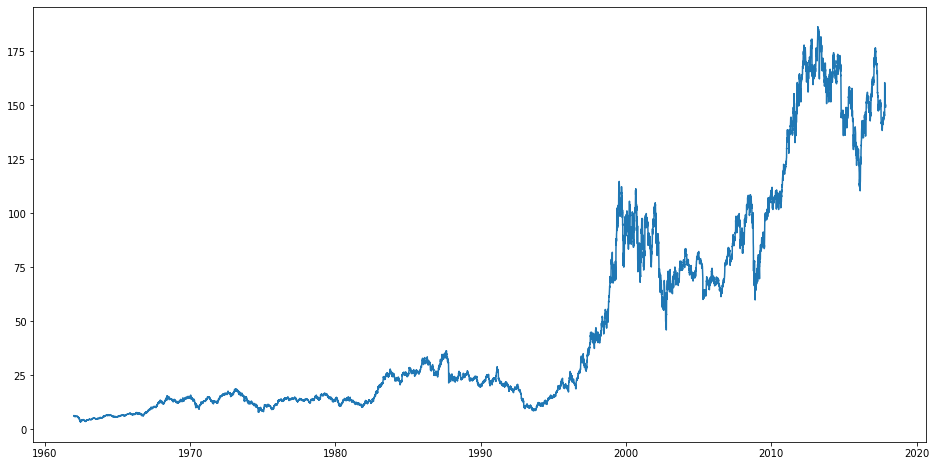

In [47]:
ngl = all_stocks[np.argmax(lengths)]
ngl['Date'] = pd.to_datetime(ngl['Date'])

plt.figure(figsize=(16,8))
plt.plot(ngl['Date'], ngl['Close'])